In [21]:
# Import library/modul yg dibutuhkan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Koneksikan dgn Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Muat datasets
url = "/content/drive/MyDrive/Colab Notebooks/datasets/diabetes.csv"
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Preprocessing: memisahkan antara data train dan test
df_X=df.iloc[:,:-1]
df_Y=df.iloc[:,8]
X_train,X_test,Y_train,Y_test=train_test_split(df_X,df_Y,test_size=0.3,random_state=33)


In [5]:
# Changing the index of the records to sequential
X_train.index=range(len(X_train))
Y_train.index=range(len(X_train))
X_test.index=range(len(X_test))
Y_test.index=range(len(Y_test))

In [7]:
# Data Training
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,85,65,0,0,39.6,0.930,27
1,12,121,78,17,0,26.5,0.259,62
2,2,92,52,0,0,30.1,0.141,22
3,1,106,76,0,0,37.5,0.197,26
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
532,11,127,106,0,0,39.0,0.190,51
533,10,133,68,0,0,27.0,0.245,36
534,2,175,88,0,0,22.9,0.326,22
535,5,166,76,0,0,45.7,0.340,27


In [8]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-5.61774358e-01, -1.10318722e+00, -1.93842987e-01, ...,
         9.82949717e-01,  1.32264230e+00, -5.17068545e-01],
       [ 2.47316357e+00,  1.14142496e-04,  4.55182381e-01, ...,
        -6.35407850e-01, -6.45817210e-01,  2.40924982e+00],
       [-5.61774358e-01, -8.88656402e-01, -8.42868354e-01, ...,
        -1.90668366e-01, -9.91984456e-01, -9.35114026e-01],
       ...,
       [-5.61774358e-01,  1.65506619e+00,  9.54432663e-01, ...,
        -1.08014733e+00, -4.49264621e-01, -9.35114026e-01],
       [ 3.48707021e-01,  1.37924085e+00,  3.55332324e-01, ...,
         1.73653607e+00, -4.08193931e-01, -5.17068545e-01],
       [-2.58280565e-01,  1.53350443e-01,  9.54432663e-01, ...,
         9.45888094e-01,  6.59644015e-01, -5.17068545e-01]])

In [9]:
# Membuat dan melatih klasifikasi K-NN
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Proses data test
X_test

array([[-0.86526815,  0.42917578, -0.7430183 , ..., -0.6107001 ,
         0.60977246,  2.40924982],
       [ 0.34870702,  0.45982304,  0.65488249, ..., -3.90918461,
         0.47189229,  2.9945135 ],
       [ 2.47316357, -1.13383448,  0.15563221, ..., -0.24008386,
        -0.53433962,  1.07150428],
       ...,
       [-0.25828057, -0.30635846, -0.64316824, ..., -0.19066837,
         0.22840177, -0.26624126],
       [ 2.16966978, -1.10318722,  0.25548227, ..., -0.19066837,
        -0.52553876,  0.15180422],
       [-0.56177436, -0.64347832, -0.0440679 , ...,  0.8470571 ,
        -0.45513186, -0.60067764]])

In [11]:
# Proses data prediksi
Y_pred = classifier.predict(X_test)

In [12]:
Y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0])

In [13]:
# Tampilkan hasil prediksi (5 pertama dan 5 terakhir dari total data)
Y_test

0      0
1      0
2      1
3      0
4      1
      ..
226    0
227    1
228    0
229    0
230    0
Name: Outcome, Length: 231, dtype: int64

Akurasi: 0.75
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       146
           1       0.68      0.64      0.65        85

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



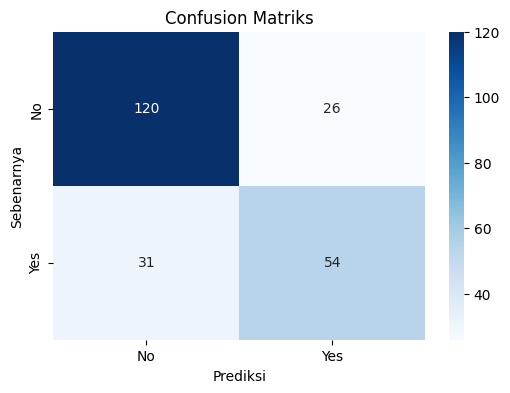

In [24]:
# Hitung akurasi
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Tampilkan Classification Report
print(classification_report(Y_test, Y_pred))

# Tampilkan dan visualisasikan Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
# Visualisasikan Confusion Matrix menggunakan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Confusion Matriks')
plt.show()
